## Observations and Insights 

## Data Observations

The follow data tables and charts yield interesting results related to the efficacy fo Drug Regimen on tumor volume. I know that in studies that the placebo is an important part of analyzing the data, so I added to the requirements of the assigment by creating some plots for the placebo drug and correlations. I incorporated these results into my analysis. The three main observations I'll expand on below are:
1) There was significant difference between drug regimens.
2) Mouse weight had a siginficant impact on tumor size whereas mouse weight had no impact upon tumor size in the placebo group.
3) The relationship between IQR and Variance in the Drug Regimens

The first main observation is that Drug Regimen appears to have a significant impact upon tumor size. Even among the top four drug regimens noted there is a variance of almost 20 mm3 between the top ranked and fourth ranked drug. That comes out to roughly a difference of 50%. Both Capomulin and Ramicane had an average tumor volume of about 38 (mm3) whereas Infubinol had an average tumor size of almost 60 (mm3). This data supports an inference that first of all the drugs are effective in reducing tumor size and secondly that there is a strong degree of difference between drugs. 

The second observation is to notice an interesting relatioship between tumor size and mouse weight. I calculated the average tumor rate vs. the Placebo. An interesting
phenomenon I found is that there was no correlation between tumor size and mouse weight. I had thought that tumor size may be mildly correlated with the size of the mouse. The
assumption being that a bigger tumor may grow on a bigger mouse. However, this was in fact not the case and indeed there was a negative Pearson correlation of -0.17 between
mouse weight and tumor size. That is tumor weight had no impact on size.

The importance of studying the placebo in this case illuminates the question of why tumor size is correlated strong at a Pearson correlation of 0.84 with mouse weight. In other words, the drug regimen is more effective with smaller mice by a considerable margin. The most likely answer for this is that the mice received a similar dosage and therefore the drug was more effective in smaller mice. A reasonable hypothesis is that this increased the potency of the drug and the ability of the drug to focus on the tumor size. Without knowing the exact parameters in which the tests were performed I cannot speak with greater clarity. However, if I was a researcher this data would make me want to explore in depth the correlation between dosage and efficacy of the drug.

The final inference I had was more of a question of whether the sample size is sufficient for concrete results? I do not know the pharmaceutical industry's best practices, but 25 mice seems like a small N. As an example, I created a pivot table of the Capomulin data to create lineplots for all the mice under that regimen. While on average this drug produced some of the best results, as the pivot table graph shows, there is still considerable variance and results between the mice under that study. Some mice hardly improved and one outlier grew worse. The IQR of Capomulin appears to be very good still at 7.78 (mm3). However, charting out the plots also helped me to see that even with a realtively low IQR compared to the other drugs, a different visualization gives a different nuance and inflection to the data points. So in general I think the stats do show that the better drugs have overall lower final tumor volumes and also that the are more "precise" meaning that there seems to be less variance between the final result. That suggests they are potent and effective. Yet there still is alot of unexplained variance, or at least uncertainty in the data. Whether that is acceptable is something I can't definitively say because I don't know what are acceptable thresholds of correlation, test size and variance in this particular science field. 

In [1]:
# I import my librares and merge the data sets to create my dataframe.
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_total = pd.merge(mouse_metadata, study_results, left_on='Mouse ID', right_on='Mouse ID', how='outer')

In [2]:
# I wasn't sure if the number of mice referred to the unique mice or the total number of data points taken so I recorded both.
unique_mouse_count = mouse_total['Mouse ID'].nunique()
print(f"The number of unique mice is {unique_mouse_count}")
print(f"The total number of mouse data points is {mouse_total['Mouse ID'].count()}")



The number of unique mice is 249
The total number of mouse data points is 1893


In [3]:
# An easy way to find the duplicate mouse data is to group by both 'Mouse ID' and 'Timepoint' and then peforming a count aggregation.
# Any value other than 1 means that there is duplicate data for the same id and timepoint. A loc function can then find that duplicate data by looking
# at any value in the data frame that is greater than 1. Running this operation with counting 'Drug Regimen' (but any value would work) shows that there is duplicate
# data for Mouse Id g989 where some (but not all) timepoints are recorded twice. 

duplicate_mouse_data = mouse_total.groupby(['Mouse ID', 'Timepoint']).count()

duplicate_mouse_data.loc[duplicate_mouse_data['Drug Regimen'] > 1, :]



Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [4]:
# A simply way to get the duplicated data is to simply do a loc function with the mouse id. If there were many duplicates than a more complicated function could have been
# written that uses a lambda function to search for all the id. But since there is only one duplicate ID, manually putting that value in suffices. 
duplicated_data = mouse_total.loc[mouse_total['Mouse ID'] == 'g989', :]
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# There was discussion with the TAs about whether all data related to the mouse should be dropped or just the duplicates. The method below functions by finding the index
# where all data points related to the mouse id occur and omitting them. This is probably wise here because the data is not just duplicated, but for some values there are
# different values at the same timepoint. If a researcher wanted to keep this data however, the drop_duplicates can be used. The user would just need to specify the 
# keyword argument keep=First or Last which would only keep the first line of duplicate data. To reference my sources I used this article to coordinate the index function 
# with drop: https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

duplicate_index = mouse_total[mouse_total['Mouse ID'] == 'g989'].index

mouse_total.drop(duplicate_index, inplace=True)
print(f"The number of unique mice is {mouse_total['Mouse ID'].nunique()}")
print(f"The total number of mice datapoints is {mouse_total['Mouse ID'].count()}")

The number of unique mice is 248
The total number of mice datapoints is 1880


## Summary Statistics

In [6]:
# Groupby and Aggregate easily create a summary statistics table of the tumor volume and then I rounded to 2 to make the data more readable. I didn't need to make a list
# of series and combine them because agg can do it all at once.

regimen_tumor = mouse_total.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std',
                                                                                      'sem']})

regimen_tumor.round(2)


Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

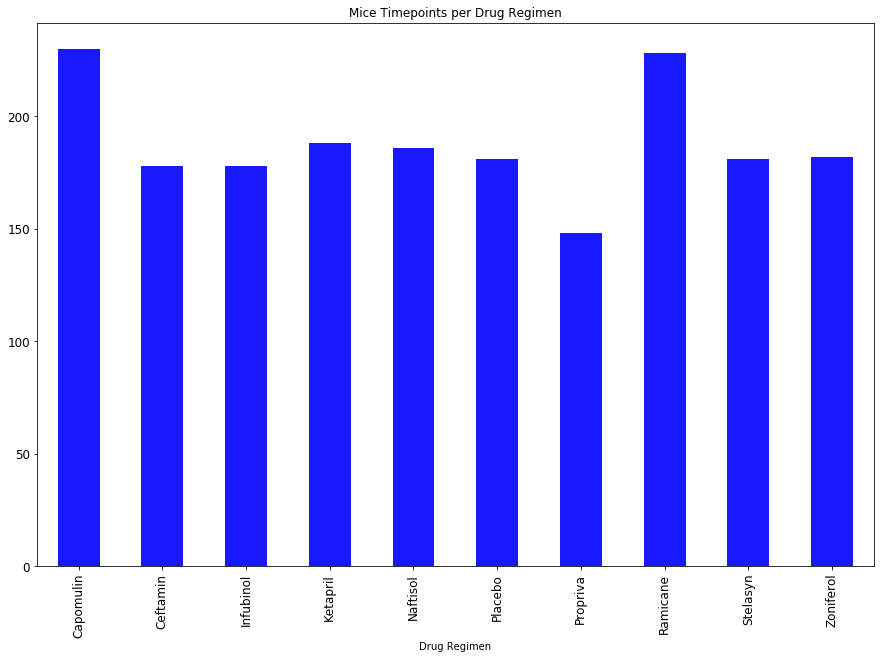

In [7]:
# It was unclear whether the "total mice" meant the number of unique mice or the number of timepoint stamps recorded so to cover my bases I made bar charts for both
# contingencies. I just used the count function to get the number of data points in this first example and used .nunique in the second to get the second bar chart below.
# Also the semicolon hides the matplotlib AxesSubplot line.

mice_per_drug = mouse_total.groupby(['Drug Regimen']).count()

mice_per_drug['Mouse ID'].plot(kind="bar", title ="Mice Timepoints per Drug Regimen", figsize=(15, 10), color='b', alpha=0.9, legend=False, fontsize=12, width=0.50);


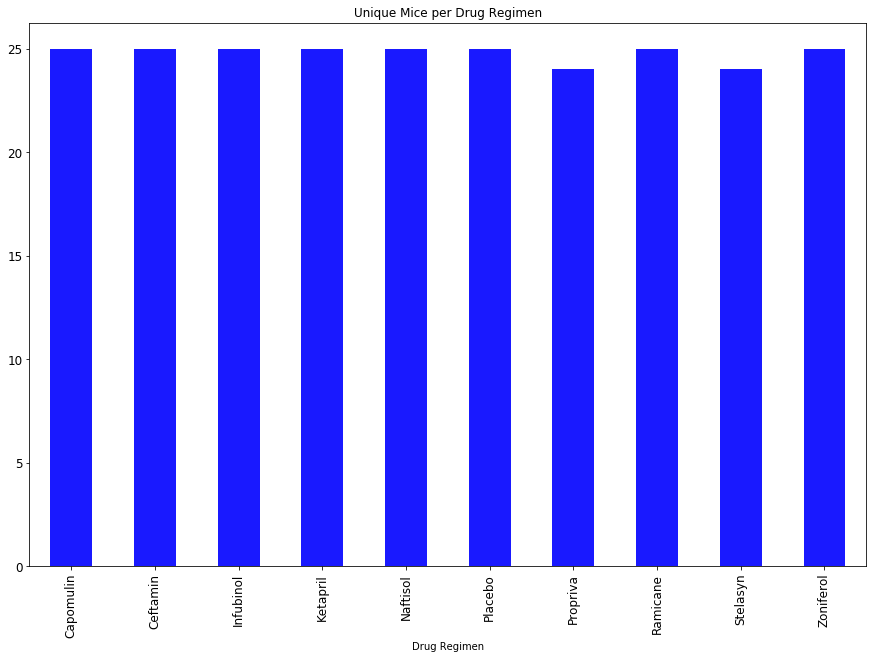

In [8]:
unique_mice_per_drug = mouse_total.groupby(['Drug Regimen']).nunique()
unique_mice_per_drug['Mouse ID'].plot(kind="bar", title ="Unique Mice per Drug Regimen", figsize=(15, 10), color='b', alpha=0.9, legend=False, fontsize=12, width=0.50);


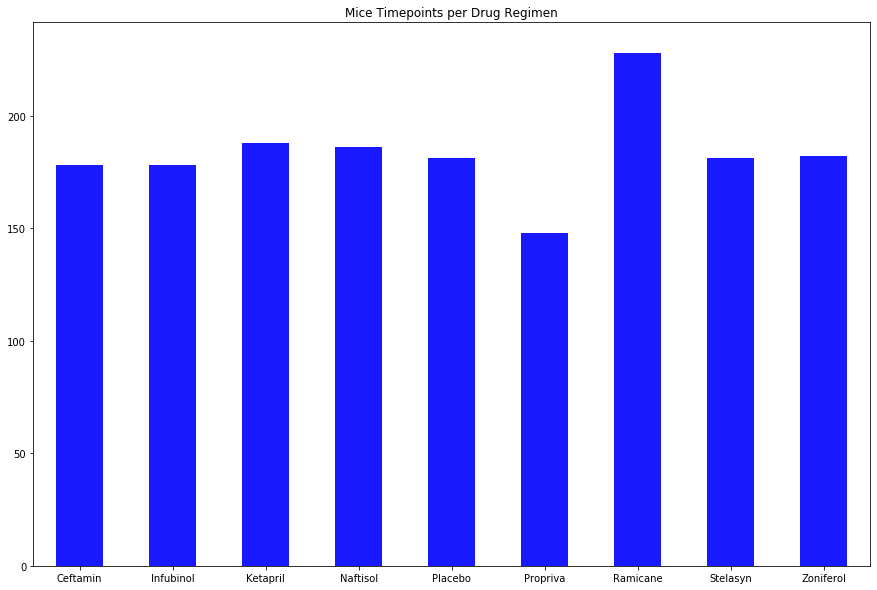

In [9]:
# There are a number of ways to list the values to get the x and y axis. I just did it be turning the unique values of the Drug Regimen and then sorting them alphabetically
# into a list. The y-axis values are simply derived from the aggregate count from above. I used xlim to approximately get the same width and spacing as the pandas plot. 
x_values = list(mouse_total['Drug Regimen'].unique())
x_axis = sorted(x_values) 
y_axis = mice_per_drug['Mouse ID']

plt.figure(figsize=(15,10))
plt.title('Mice Timepoints per Drug Regimen')
plt.xlim([0.5, 9.5]) 
plt.bar(x_axis, y_axis, color='b', alpha=0.9, align="center", width=0.50);

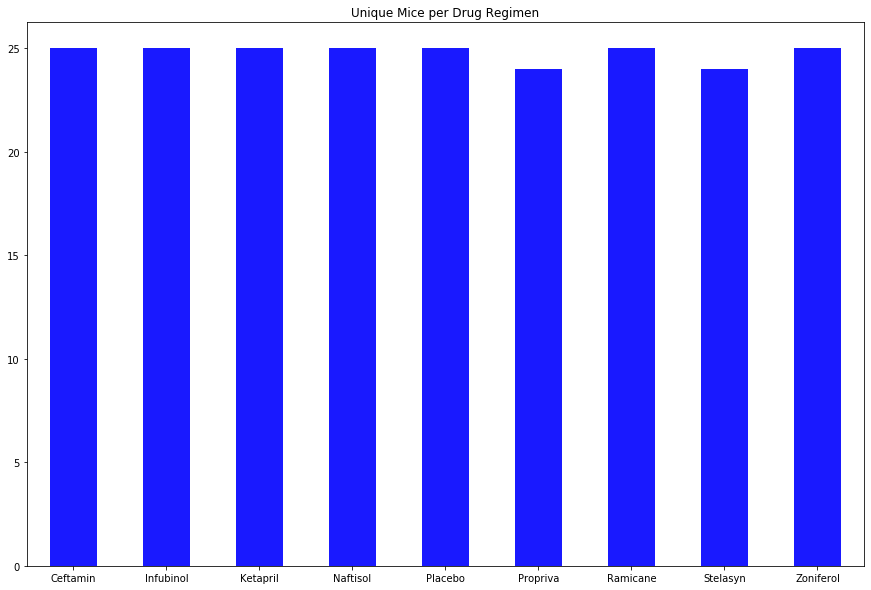

In [10]:


x_values = list(mouse_total['Drug Regimen'].unique())
x_axis = sorted(x_values)
y_axis = unique_mice_per_drug['Mouse ID']

plt.figure(figsize=(15,10))
plt.title("Unique Mice per Drug Regimen")
plt.xlim([0.5, 9.5]) 
plt.bar(x_axis, y_axis, color='b', alpha=0.9, align="center", width=0.50);

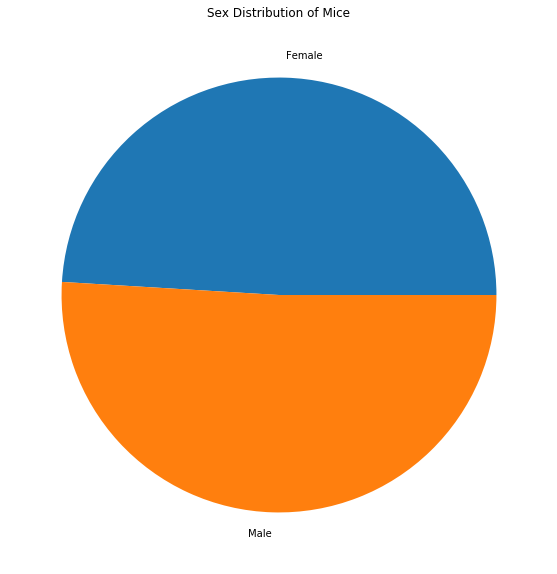

In [11]:
# The only troubleshooting in this is that pandas automatically adds a y_label. So I tried unstacking which didn't work, but then I just hard set the ylabel as nothing
# to remove it. There may be a way to have no y_label at all, but this worked well enough for this exercise.

sex_count = mouse_total.groupby('Sex').count().unstack()
sex_plot = sex_count['Mouse ID'].plot(kind='pie', title ="Sex Distribution of Mice", figsize=(15, 10), legend=False, fontsize=10);
sex_plot.set_ylabel('');

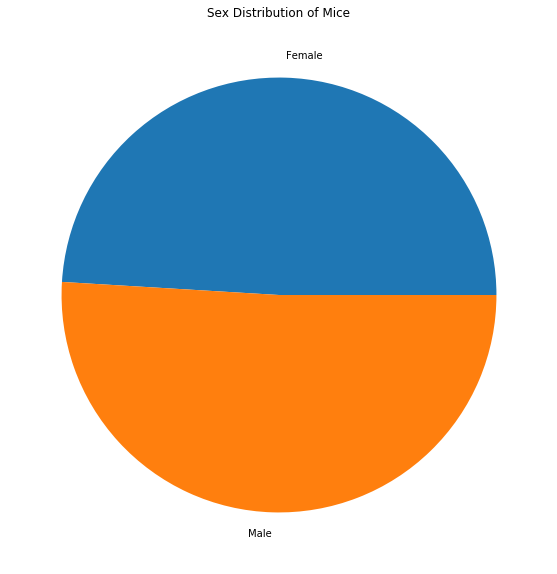

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]

sizes = list(mouse_total.groupby('Sex')['Mouse ID'].count())

plt.figure(figsize=(15,10))
plt.title("Sex Distribution of Mice")
plt.pie(sizes, labels=labels);

## Quartiles, Outliers and Boxplots

In [13]:
# There seemed to be a far simpler way to get the final tumor size than by the steps listed in the starter code. All we have to do is employ the idxmax() function which
# finds the index value of the max value in a column. So I simply grouped by Drug Regimen and Mouse Id. Then I turned the idxmax of Timepoint into a list. This list
# gives the index value for when Timepoint is greatest. I can then loop through that list by using iloc to reference the row of the final timepoint and create a new DF.
# This creates a list of final timepoint for all Drug Regimens which is more useful and then I can filter out the four grup regimens as needed with a loc.

final_timepoint = mouse_total.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].idxmax()
index_times = list(final_timepoint)

# I create an empty data frame with the same column names so I can append the appropriate rows to it.
# I had some troubleshooting with appending a dataframe. From StackOverflow many comments said this is an expense way to do this operation, even if the code is simple. 
# The recommended way is to create a series and then compile the dataframe once. This way python has to essentially reformulate the dataframe each time and is more likely 
# to get an error. I'll remember this best practice in the future, but wanted to see if this way would work for a small data set.

column_names = ['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']
final_tumor_volumes = pd.DataFrame(columns = column_names)
for i in index_times:
    final_tumor_volumes = final_tumor_volumes.append(mouse_total.loc[i, :])


final_tumor_volumes

# A loc function that sorts the Top 4 Drug Values yields a complete DF for analysis.

top4_drugs = final_tumor_volumes.loc[(final_tumor_volumes['Drug Regimen']=='Capomulin') | (final_tumor_volumes['Drug Regimen']=='Ramicane') |
                                    (final_tumor_volumes['Drug Regimen']=='Infubinol') | (final_tumor_volumes['Drug Regimen']=='Ceftamin')]

top4_drugs.reset_index(drop=True, inplace=True)
top4_drugs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,45,38.982878,2
1,b742,Capomulin,Male,7,21,45,38.939633,0
2,f966,Capomulin,Male,16,17,20,30.485985,0
3,g288,Capomulin,Male,3,19,45,37.074024,1
4,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
95,s508,Ramicane,Male,1,17,45,30.276232,0
96,u196,Ramicane,Male,18,25,45,40.667713,3
97,w678,Ramicane,Female,5,24,5,43.166373,0
98,y449,Ramicane,Male,19,24,15,44.183451,0


In [14]:
# I created smallar data series with the loc function so that it would be easier to calculate quartiles. I also wanted to see how thes copmared to the aggregate of 
# all 4 drugs so I made a fifth data set.

capomulin_tumor = top4_drugs.loc[top4_drugs['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
ramicane_tumor = top4_drugs.loc[top4_drugs['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
infubinol_tumor = top4_drugs.loc[top4_drugs['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
ceftamin_tumor = top4_drugs.loc[top4_drugs['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']
all_tumor_size = top4_drugs['Tumor Volume (mm3)']

# To avoid DRY (don't repeat yourself) I made two functions to calculate results. The first returns the iqr and the second calculates the bounds. I'm trying to get better
# at DRY and making my code cleaner. I probably could have added the print function instead of manually printing them all out as well upon review.

def quartile_cal (tumorsizes):
    quartiles = tumorsizes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    return round(iqr, 2)
    

print(f"The iqr of Capomulin is {quartile_cal(capomulin_tumor)}")
print(f"The iqr of Ramicane is {quartile_cal(ramicane_tumor)}")
print(f"The iqr of Infubinol is {quartile_cal(infubinol_tumor)}")
print(f"The iqr of Ceftamin is {quartile_cal(ceftamin_tumor)}")
print(f"The iqr of the top 4 regimens is {quartile_cal(all_tumor_size)}")

def outliers (tumorsizes):
    quartiles = tumorsizes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    return f"below {round(lower_bound, 2)} and above {round(upper_bound, 2)}."
    
print(f"The outliers for Capomulin may be {outliers(capomulin_tumor)}")
print(f"The outliers for Ramicane may be {outliers(ramicane_tumor)}")
print(f"The outliers for Infubinol may be {outliers(infubinol_tumor)}")
print(f"The outliers for Ceftamin may be {outliers(ceftamin_tumor)}")
print(f"The outliers for the top 4 regimens may be {outliers(all_tumor_size)}")

# This function creates a list of the outlier values. I just recorded the values since it seemed we didn't do much analysis with that data. But the function returns
# a list of the values. But if it was of more importance I could have appended the mouse id and other relevant data. But since there was only one outlier beyond the 
# lower bound this was sufficient for the present.

def outlier_detector(tumorsizes):
    quartiles = tumorsizes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = []
    for size in tumorsizes:
        if size < lower_bound or size > upper_bound: 
            outliers.append(size)
            return(outliers)


print(f"The Capomulin outliers are: {outlier_detector(capomulin_tumor)}")
print(f"The Ramicane outliers are: {outlier_detector(ramicane_tumor)}")
print(f"The Infubinol outliers are: {outlier_detector(infubinol_tumor)}")
print(f"The Ceftamin outliers are: {outlier_detector(ceftamin_tumor)}")
print(f"The outliers of the top 4 are: {outlier_detector(all_tumor_size)}")

The iqr of Capomulin is 7.78
The iqr of Ramicane is 9.1
The iqr of Infubinol is 11.48
The iqr of Ceftamin is 15.58
The iqr of the top 4 regimens is 22.74
The outliers for Capomulin may be below 20.7 and above 51.83.
The outliers for Ramicane may be below 17.91 and above 54.31.
The outliers for Infubinol may be below 36.83 and above 82.74.
The outliers for Ceftamin may be below 25.36 and above 87.67.
The outliers for the top 4 regimens may be below 3.07 and above 94.04.
The Capomulin outliers are: None
The Ramicane outliers are: None
The Infubinol outliers are: [36.321345799999996]
The Ceftamin outliers are: None
The outliers of the top 4 are: None


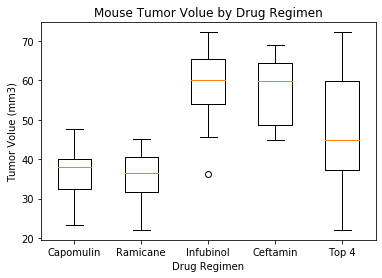

In [15]:
# This code simply creates a box and whisker plot that also shows the sole outlier with a circle.

fig1, ax = plt.subplots()
ax.set_title('Mouse Tumor Volue by Drug Regimen')
ax.set_ylabel('Tumor Volue (mm3)')
ax.set_xlabel('Drug Regimen')
ax.boxplot([capomulin_tumor, ramicane_tumor, infubinol_tumor, ceftamin_tumor, all_tumor_size], labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin', 'Top 4'])
plt.show()


## Line and Scatter Plots

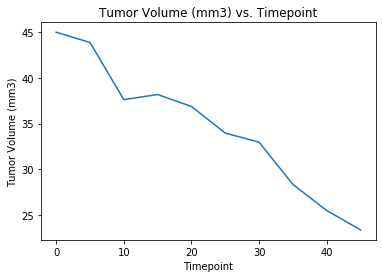

In [16]:
# To calculate a lineplot for one mouse I just randomly selected a mouse id from the regimen and then created my x and y-axis with a loc function. The rest is basic
# pyplot format. 

x_axis = mouse_total.loc[(mouse_total['Mouse ID']== 's185'), ['Timepoint']]
y_axis = mouse_total.loc[(mouse_total['Mouse ID']== 's185'), ['Tumor Volume (mm3)']]
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) vs. Timepoint")
plt.plot(x_axis, y_axis);

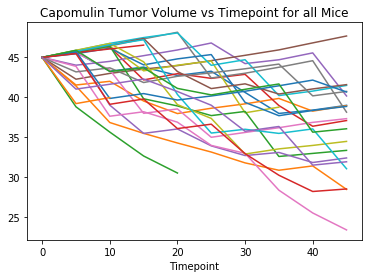

In [17]:
# I wanted to take a look at all the mice per Drug Regimen just to see how the data compared to the mouse ID I selected, (this coincidentally was the Mouse with the best 
# performance to the drug). To get a visual representation of how much variance was at play I ploted the entire pivot table. I didn't format the table here simply because 
# it was for my own analysis. But I learned the pivot function which is very useful for grouping and then plotting the data. 

cap_mice = mouse_total.loc[(mouse_total['Drug Regimen']== 'Capomulin')]

cap_mice_pivot = cap_mice.pivot(index='Timepoint', columns='Mouse ID', values='Tumor Volume (mm3)')

cap_mice_pivot.plot(legend=False, title = 'Capomulin Tumor Volume vs Timepoint for all Mice');

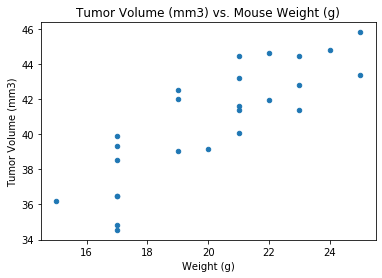

In [18]:
# Scatter plot of average tumor vs weight. This is just accomplished by groupby and aggregate and then defining the values for the plot with Pandas plot. The plot function
# automatically adds the x and y labels so I didn't need to do it for this plot. 

cap_avg_tumor = mouse_total.loc[mouse_total['Drug Regimen'] == 'Capomulin']
cap_weight = cap_avg_tumor.groupby(['Mouse ID', 'Weight (g)']).aggregate({'Tumor Volume (mm3)': 'mean'}).reset_index()
cap_weight.plot.scatter(x ='Weight (g)', y = 'Tumor Volume (mm3)', title = 'Tumor Volume (mm3) vs. Mouse Weight (g)');

## Correlation and Regression

The Pearson correlation coefficient is 0.84


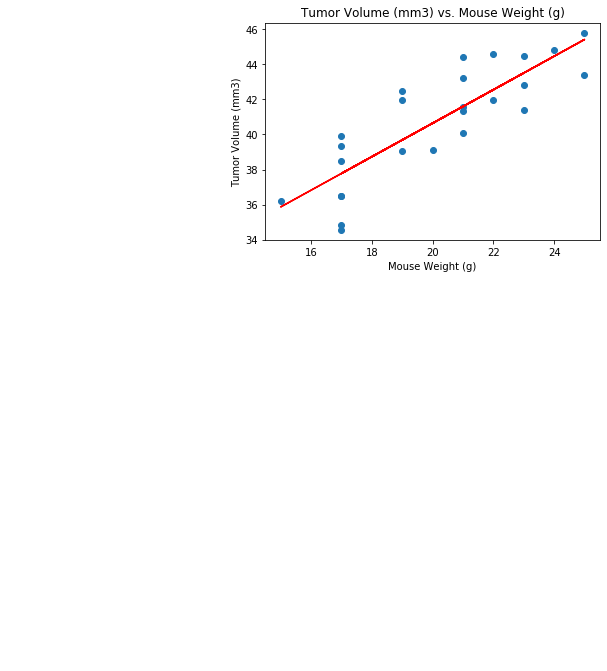

In [19]:
# The correlation and regression are easy. To note my sources I just copied the code we were taught in the lesson plan. I just have to import linregress and then
# I can get all my values. I like the Pearson correlation the best so I added that method onto my code.

from scipy.stats import linregress

cap_corr = cap_weight['Weight (g)'].corr(cap_weight['Tumor Volume (mm3)'], method='pearson')


x_values = cap_weight['Weight (g)']
y_values = cap_weight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The Pearson correlation coefficient is {round(cap_corr, 2)}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Tumor Volume (mm3) vs. Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Mouse Weight (g)')
plt.show();



The Pearson correlation coefficient is -0.17



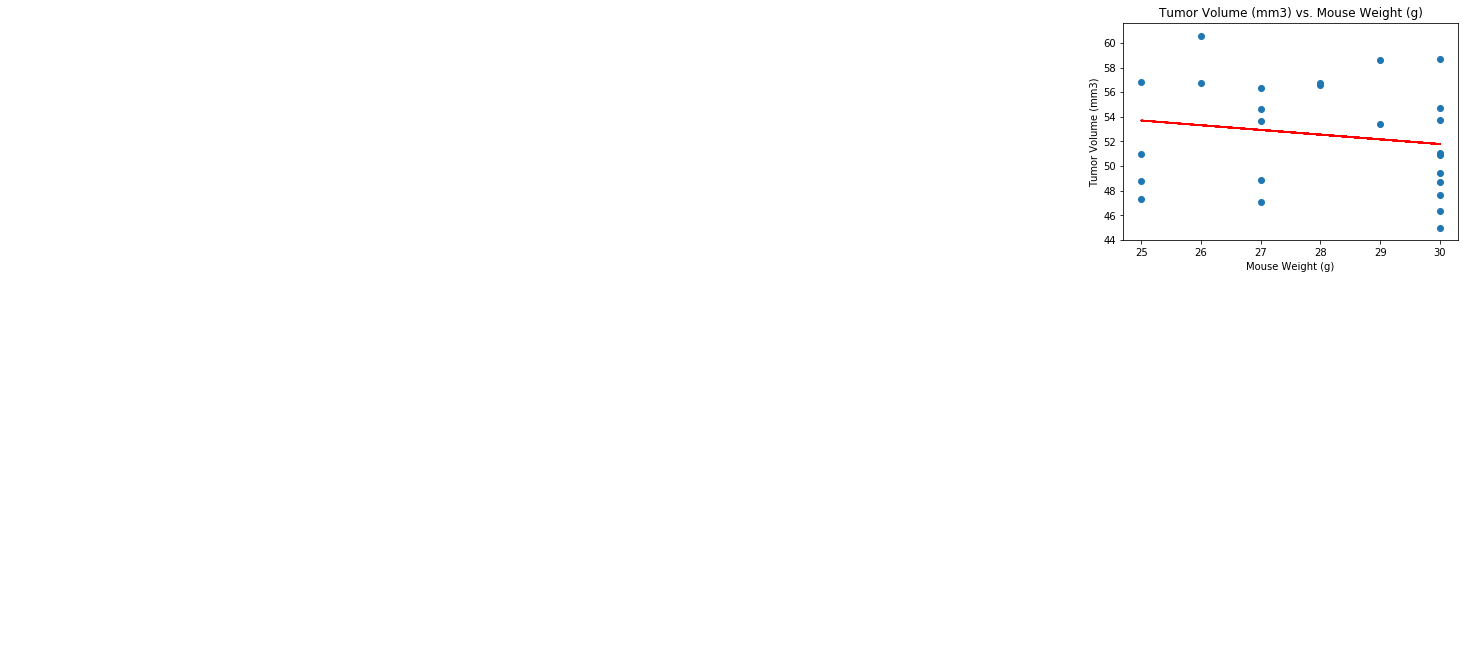

In [20]:
# I charted the Placebo for more refined data analysis. The code just repeats the same logic as above. 

placebo_avg_tumor = mouse_total.loc[mouse_total['Drug Regimen'] == 'Placebo']
placebo_weight = placebo_avg_tumor.groupby(['Mouse ID', 'Weight (g)']).aggregate({'Tumor Volume (mm3)': 'mean'}).reset_index()
placebo_weight.plot.scatter(x ='Weight (g)', y = 'Tumor Volume (mm3)');

from scipy.stats import linregress

placebo_corr = placebo_weight['Weight (g)'].corr(placebo_weight['Tumor Volume (mm3)'], method='pearson')
print(f"The Pearson correlation coefficient is {round(placebo_corr, 2)}\n")

x_values = placebo_weight['Weight (g)']
y_values = placebo_weight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Tumor Volume (mm3) vs. Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Mouse Weight (g)')
plt.show();